<a href="https://colab.research.google.com/github/shajarian/NN/blob/main/Copy_of_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shaghayegh (Shirley) Shajarian**

**Assignment 2**


In [ ]:
# Generate data
# inputs = torch.tensor([[0.05, 0.1]] * 1000)
# outputs = torch.tensor([[0.01, 0.99]] * 1000)

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from matplotlib import pyplot as plt

Since I do not know if generating all similar sample or generating 1000 random samples between input and output was required, I wrote both of them.


In [ ]:
torch.manual_seed(27)
num_samples = 1000

inputs = torch.rand(num_samples, 2) * 0.05 + 0.05
outputs = torch.rand(num_samples, 2) * 0.98 + 0.01

In [ ]:
print("First 10 input samples:")
print(inputs[:10])
print()

print("First 10 output samples:")
print(outputs[:10])

First 10 input samples:
tensor([[0.0992, 0.0543],
        [0.0767, 0.0610],
        [0.0631, 0.0899],
        [0.0604, 0.0727],
        [0.0573, 0.0612],
        [0.0870, 0.0644],
        [0.0829, 0.0954],
        [0.0844, 0.0781],
        [0.0954, 0.0625],
        [0.0882, 0.0893]])

First 10 output samples:
tensor([[0.4313, 0.1018],
        [0.5656, 0.6010],
        [0.9789, 0.7875],
        [0.1010, 0.8785],
        [0.8928, 0.5950],
        [0.4288, 0.9534],
        [0.7497, 0.0950],
        [0.1297, 0.0758],
        [0.2142, 0.7994],
        [0.4747, 0.1173]])


In [ ]:
# Create Neural Network
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.hidden1 = nn.Linear(2, 2, bias=True)
    self.hidden2 = nn.Linear(2, 2, bias=True)
    self.hidden3 = nn.Linear(2,2, bias=True)
    self.output = nn.Linear(2,2, bias=True)

  def forward(self, x):
    x = F.sigmoid(self.hidden1(x))
    x = F.sigmoid(self.hidden2(x))
    x = F.sigmoid(self.hidden3(x))
    x = F.sigmoid(self.output(x))

    return x


In [ ]:
# Neural Network, Optimizer, Loss function
neuralnetwork = NeuralNetwork()
opt = Adam(neuralnetwork.parameters())
loss_fn = nn.MSELoss()

In [ ]:
batch_size = 1
dataset = torch.utils.data.TensorDataset(inputs, outputs)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
store = []
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data

        opt.zero_grad()
        outputs = neuralnetwork(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        running_loss += loss.item()
    store.append(running_loss/len(dataloader))
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(dataloader)))

Epoch 1 loss: 0.080
Epoch 2 loss: 0.078
Epoch 3 loss: 0.078
Epoch 4 loss: 0.078
Epoch 5 loss: 0.078
Epoch 6 loss: 0.078
Epoch 7 loss: 0.078
Epoch 8 loss: 0.078
Epoch 9 loss: 0.078
Epoch 10 loss: 0.078


In [ ]:
store

[0.08322184072074106,
 0.07837217330426847,
 0.07829826430595131,
 0.07830442326384945,
 0.07829185052347021,
 0.07831484744825866,
 0.07829101043895935,
 0.07828792021793197,
 0.07830852302047424,
 0.07829035430212389]

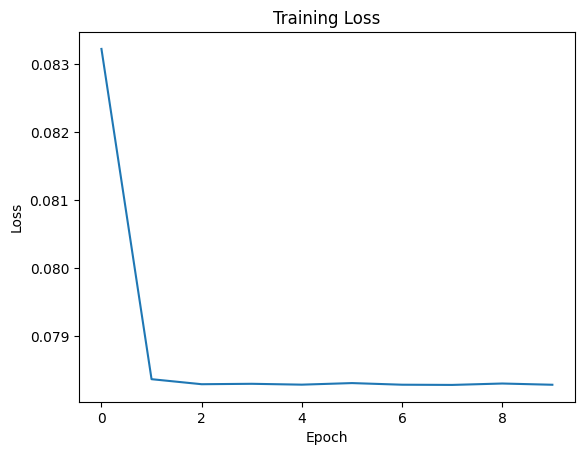

In [ ]:
plt.plot(store)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()